In [69]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

data = pd.read_csv('https://raw.githubusercontent.com/albendsouza/Dynamics-of-monetary-policy-spillover-The-role-of-exchange-rate-regimes/main/data.csv', index_col='Date', parse_dates=True)


In [70]:
# Test for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series, signif=0.05):
    dftest = adfuller(series, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        adf['Critical Value (%s)' % key] = value
    p = adf['p-value']
    if p <= signif:
        print(f"ADF test for {series.name}: Reject H0 - Time series is stationary")
    else:
        print(f"ADF test for {series.name}: Fail to reject H0 - Time series is non-stationary")

for col in data.columns:
    adf_test(data[col])
    
# VAR model estimation
model = sm.tsa.VAR(data)
results = model.fit()
results.summary()


ADF test for STI (India): Fail to reject H0 - Time series is non-stationary
ADF test for STI (China): Fail to reject H0 - Time series is non-stationary
ADF test for STI (Korea): Fail to reject H0 - Time series is non-stationary
ADF test for STI (Japan): Fail to reject H0 - Time series is non-stationary
ADF test for STI (Indonesia): Fail to reject H0 - Time series is non-stationary
ADF test for STI (Israel): Fail to reject H0 - Time series is non-stationary
ADF test for STI (US): Fail to reject H0 - Time series is non-stationary
ADF test for Crude Oil: Fail to reject H0 - Time series is non-stationary
ADF test for S&P 500: Fail to reject H0 - Time series is non-stationary


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 26, Apr, 2023
Time:                     19:15:58
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -18.5593
Nobs:                     67.0000    HQIC:                  -20.3490
Log likelihood:          -44.6718    FPE:                4.59621e-10
AIC:                     -21.5208    Det(Omega_mle):     1.31419e-10
--------------------------------------------------------------------
Results for equation STI (India)
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.232466         0.554334            0.419           0.675
L1.STI (India)             0.788884         0.074222           10.629           0.000
L1.STI (China)             0.04511

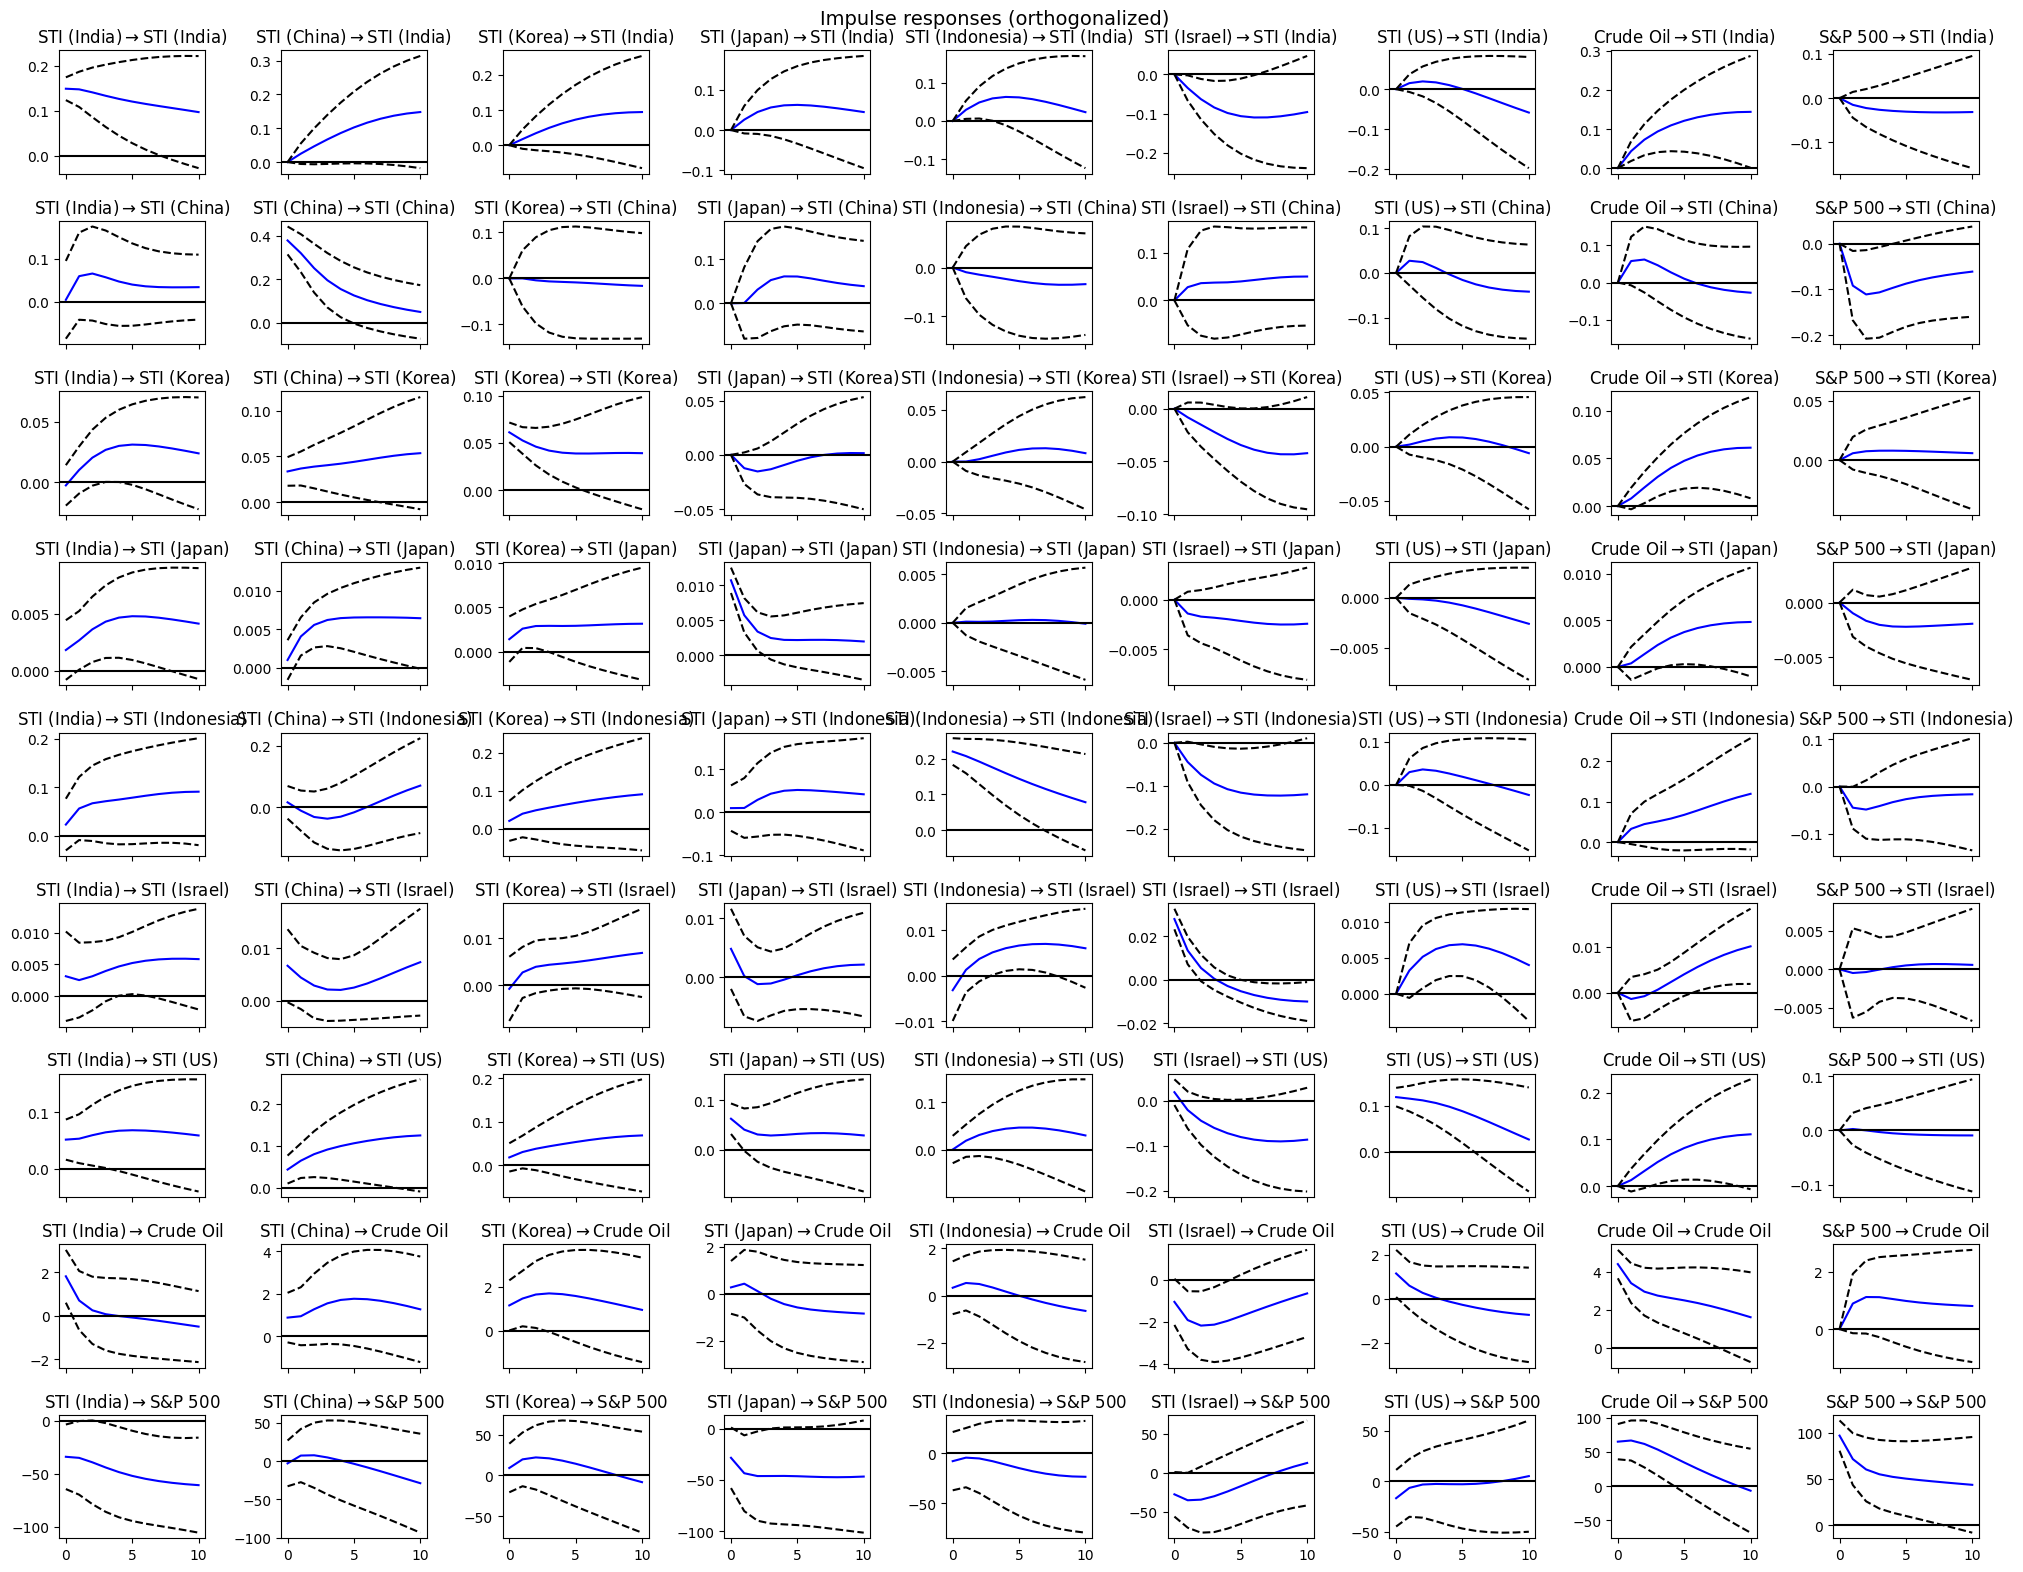

In [71]:
# IRF calculation and plot
irf = results.irf(periods=10)
fig = irf.plot(orth=True, figsize=(20, 16))
fig.tight_layout()
plt.show()


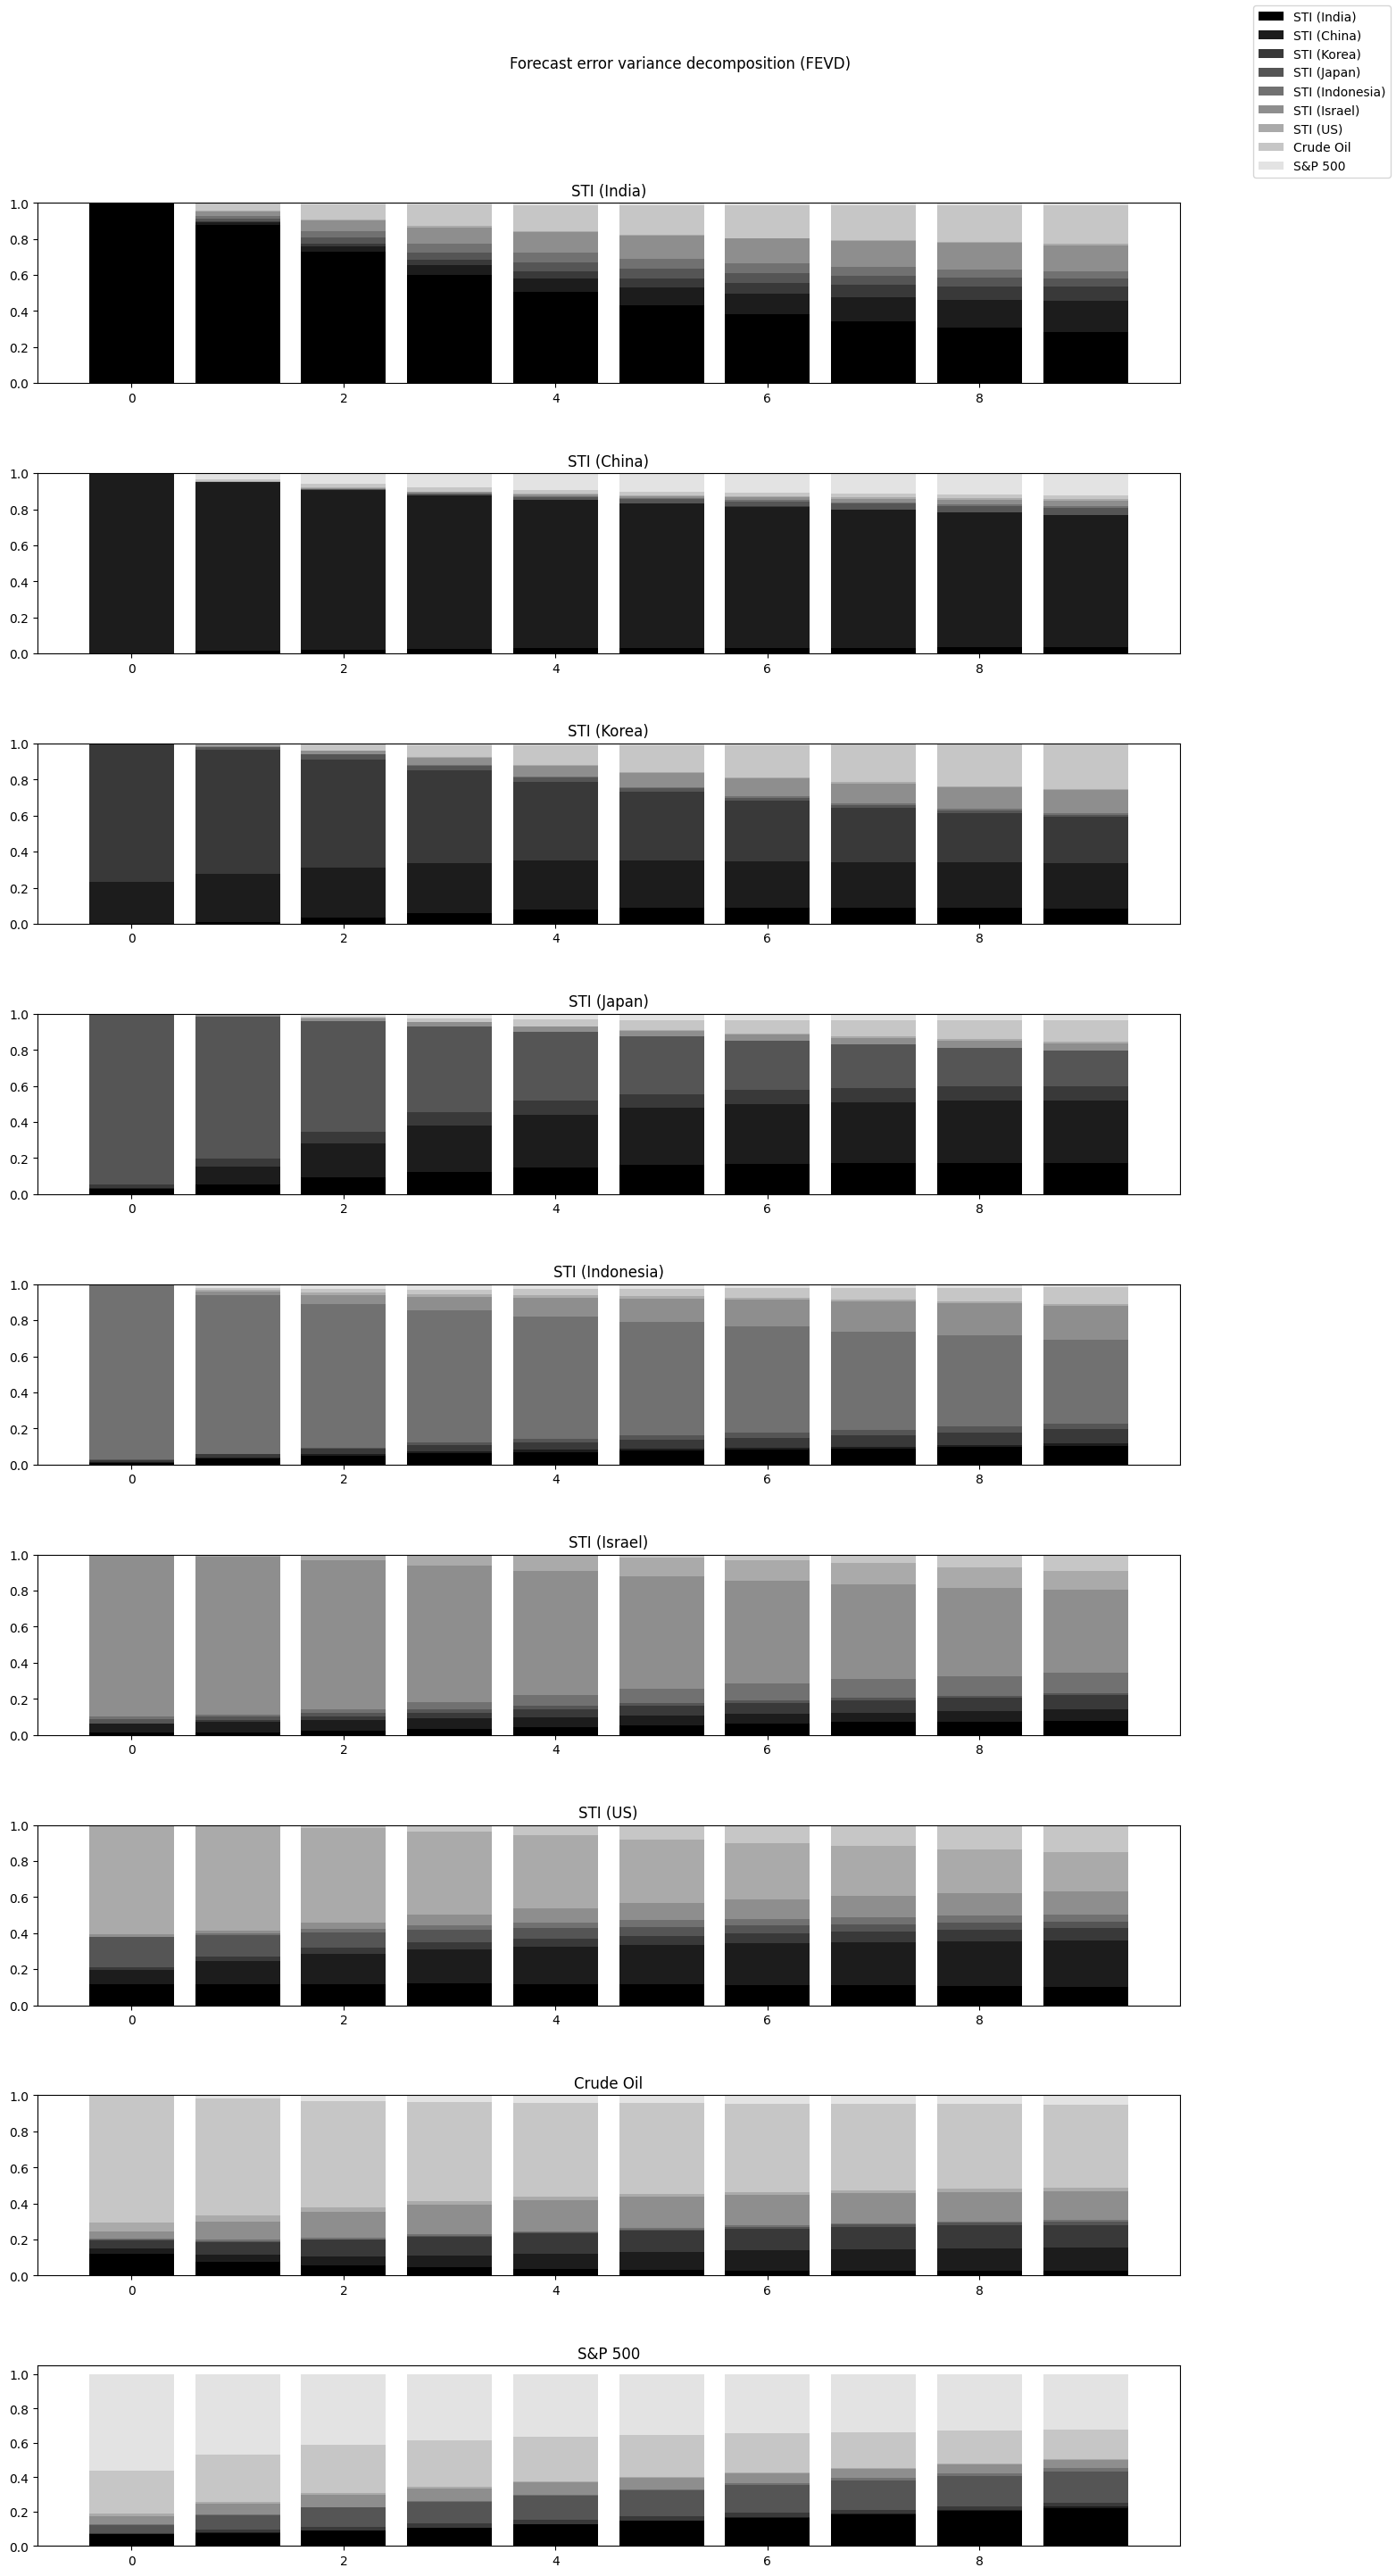

In [72]:
# FEVD calculation and plot
fevd = results.fevd(periods=10)
fevd.plot(figsize=(16,30))
plt.subplots_adjust(hspace=0.5)
plt.show()


In [73]:
fevd.summary()

FEVD for STI (India)
     STI (India)  STI (China)  STI (Korea)  STI (Japan)  STI (Indonesia)  STI (Israel)  STI (US)  Crude Oil   S&P 500
0       1.000000     0.000000     0.000000     0.000000         0.000000      0.000000  0.000000   0.000000  0.000000
1       0.879953     0.012411     0.005957     0.013380         0.017015      0.024082  0.004543   0.038001  0.004658
2       0.727426     0.031944     0.016600     0.030569         0.036273      0.059505  0.006889   0.082362  0.008433
3       0.599755     0.053731     0.028564     0.042892         0.048848      0.091025  0.006555   0.118028  0.010602
4       0.503758     0.075864     0.040103     0.049593         0.054579      0.114277  0.005132   0.144902  0.011792
5       0.433063     0.097430     0.050507     0.052229         0.055456      0.129619  0.003841   0.165395  0.012461
6       0.380512     0.117886     0.059565     0.052351         0.053371      0.138662  0.003361   0.181447  0.012844
7       0.340666     0.136893     0

In [74]:


# Load the data from the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/albendsouza/Dynamics-of-monetary-policy-spillover-The-role-of-exchange-rate-regimes/main/data.csv')

# Calculate the correlation matrix using Pearson correlation coefficients
corr_matrix = df.corr(method='pearson')

# Display the correlation matrix
print(corr_matrix)


                 STI (India)  STI (China)  STI (Korea)  STI (Japan)  \
STI (India)         1.000000     0.477559     0.890687     0.954744   
STI (China)         0.477559     1.000000     0.400722     0.599280   
STI (Korea)         0.890687     0.400722     1.000000     0.851576   
STI (Japan)         0.954744     0.599280     0.851576     1.000000   
STI (Indonesia)     0.904825     0.290197     0.815206     0.830573   
STI (Israel)        0.689297     0.155698     0.815619     0.630479   
STI (US)            0.751046     0.318180     0.884297     0.715052   
Crude Oil           0.093853     0.126089     0.259722     0.053017   
S&P 500            -0.829445    -0.431062    -0.633354    -0.846075   

                 STI (Indonesia)  STI (Israel)  STI (US)  Crude Oil   S&P 500  
STI (India)             0.904825      0.689297  0.751046   0.093853 -0.829445  
STI (China)             0.290197      0.155698  0.318180   0.126089 -0.431062  
STI (Korea)             0.815206      0.815619  0

<ipython-input-74-0b2a4f43efc6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')
